<a href="https://colab.research.google.com/github/syahla31/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laporan Praktikum Pertemuan 12 - Pengolahan Citra dan Visi Komputer**
---
Nama: Syahla' Syafiqah Fayra

NIM: 2141720015

### TUGAS PRAKTIKUM
---
Catatan: Untuk gambar pada praktikum ini menggunakan gambar pada link berikut:
https://drive.google.com/drive/folders/1d-zrwGawYJR-bOXvfd2wdNppUwjnq6ng?usp=sharing

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama "Week12.ipynb". Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan seperti biasa.

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).
Tampilkan seperti pada contoh berikut. Perhatikan pada hasil face detection dibawah ini. Secara keseluruhan, face detection dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah bermasker, atau wajah yang berukuran kecil (solvay).


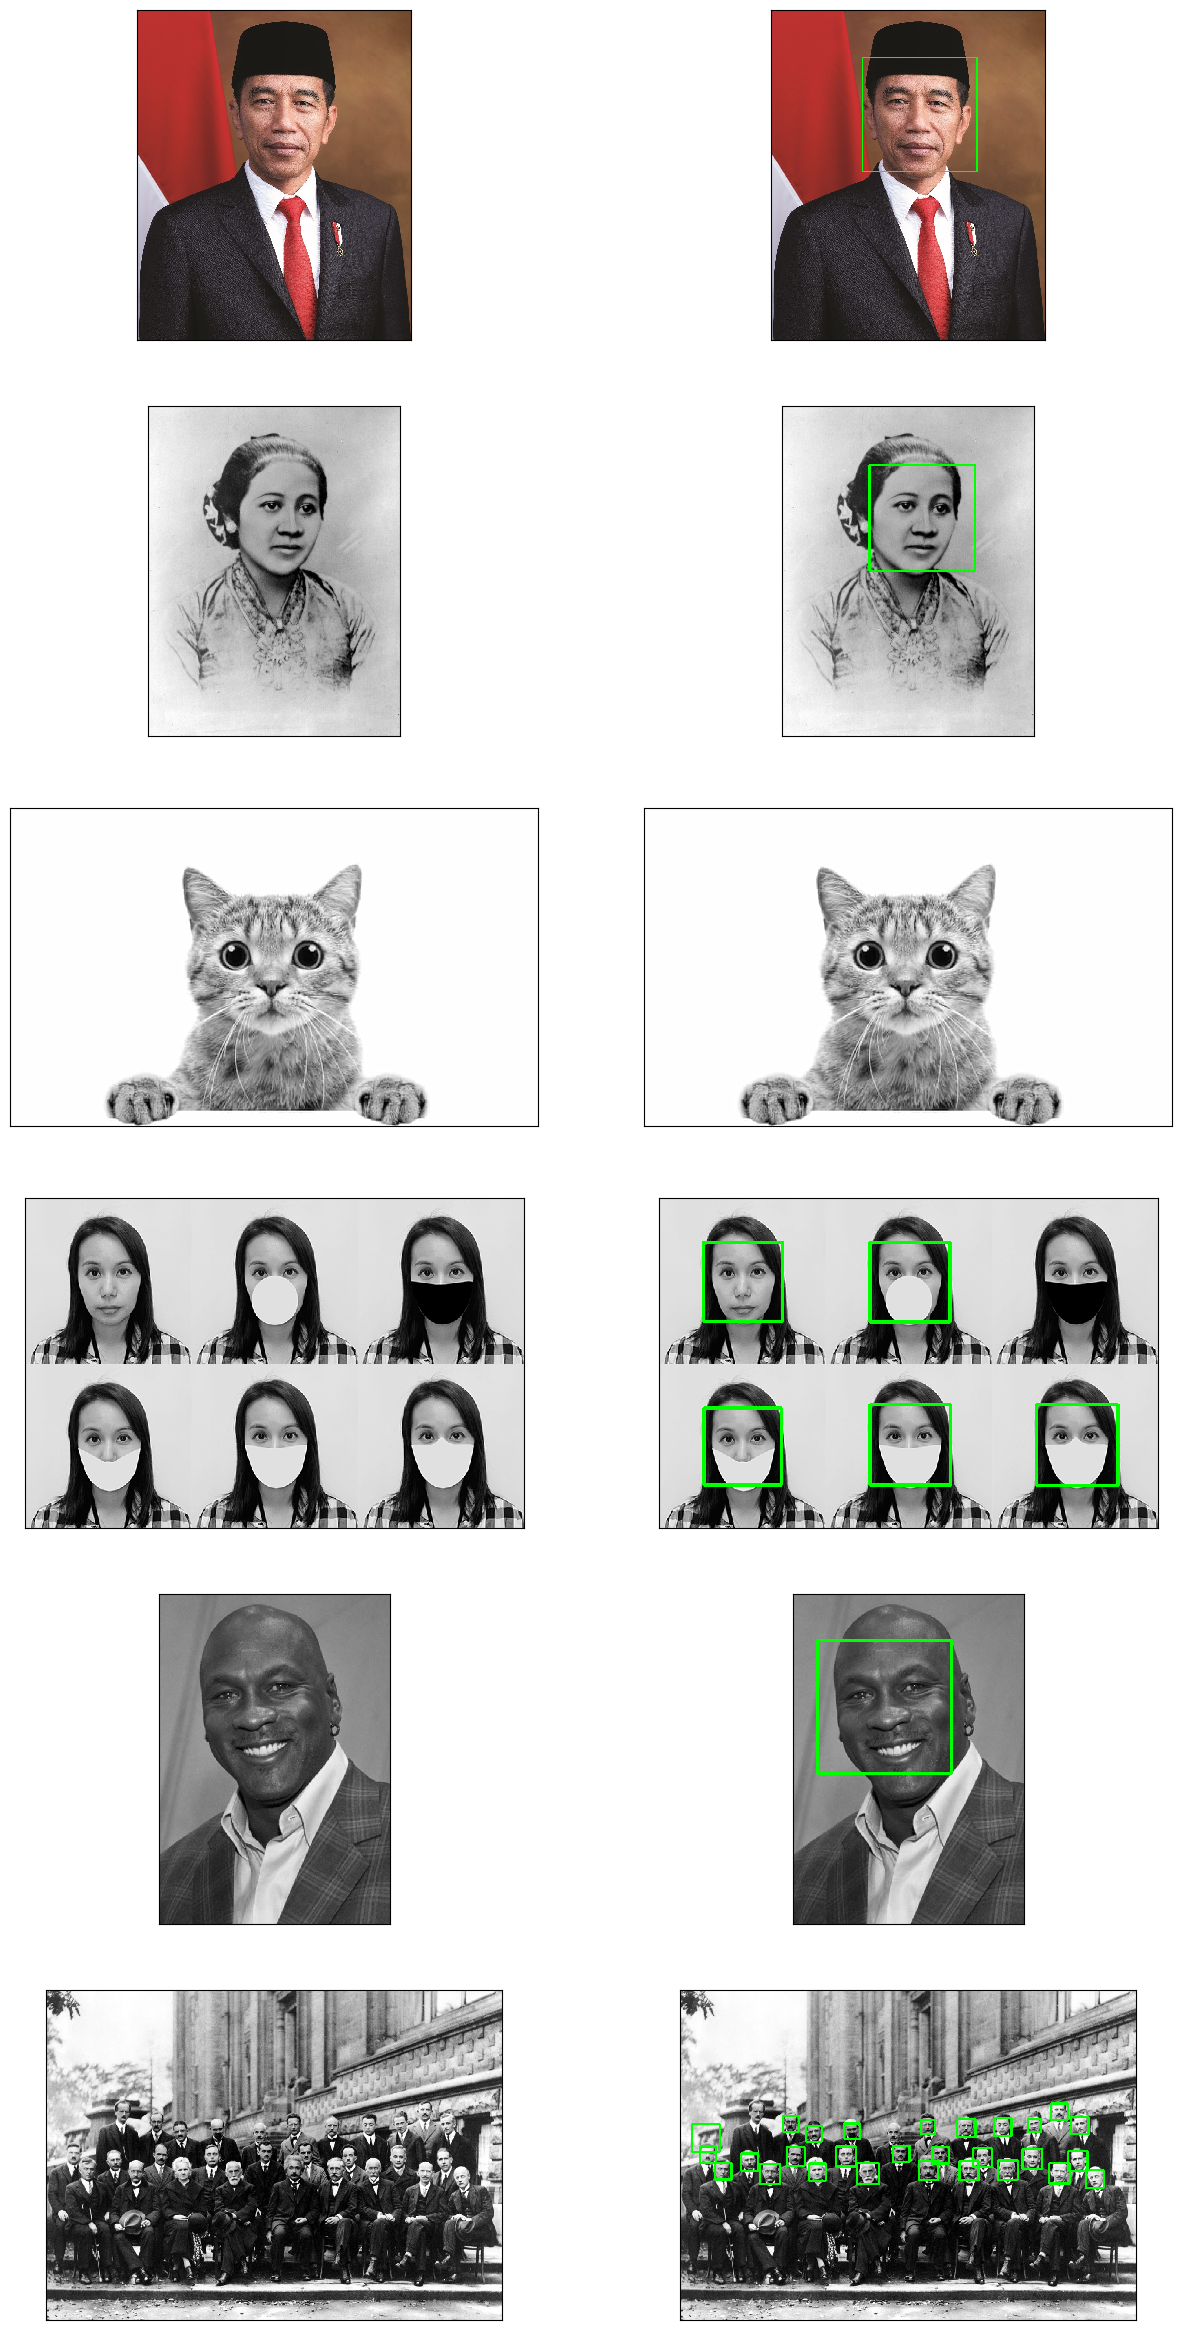

In [ ]:
def detek_wajah(img):
  img_asli = img.copy()
  img_wajah = cv.cvtColor(img_asli,cv.COLOR_RGB2GRAY)
  roi_wajah = cascade_wajah.detectMultiScale(img_wajah)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(img_asli,(x,y),(x+w,y+h),(0,255,0),3)
  return img_asli

jokowi = cv.imread('/content/drive/MyDrive/Images/Face Detection/jokowi.jpg')
kartini = cv.imread('/content/drive/MyDrive/Images/Face Detection/kartini.jpg',0)
kucing = cv.imread('/content/drive/MyDrive/Images/facedet/kucing.jpg',0)
mask = cv.imread('/content/drive/MyDrive/Images/Face Detection/mask.png',0)
mjordan = cv.imread('/content/drive/MyDrive/Images/Face Detection/mjordan.jpg',0)
solvay = cv.imread('/content/drive/MyDrive/Images/Face Detection/solvayconf.jpg',0)

jokowi = cv.cvtColor(jokowi,cv.COLOR_BGR2RGB)
kartini = cv.cvtColor(kartini,cv.COLOR_BGR2RGB)
kucing = cv.cvtColor(kucing,cv.COLOR_BGR2RGB)
mask = cv.cvtColor(mask,cv.COLOR_BGR2RGB)
mjordan = cv.cvtColor(mjordan,cv.COLOR_BGR2RGB)
solvay = cv.cvtColor(solvay,cv.COLOR_BGR2RGB)
hasil1 = detek_wajah(jokowi)
hasil2 = detek_wajah(kartini)
hasil3 = detek_wajah(kucing)
hasil4 = detek_wajah(mask)
hasil5 = detek_wajah(mjordan)
hasil6 = detek_wajah(solvay)

images = [jokowi, hasil1, kartini, hasil2, kucing, hasil3, mask, hasil4, mjordan, hasil5, solvay, hasil6]

plt.figure(figsize = (15,30))
for i in range(len(images)):
  plt.subplot(6,2,i+1),plt.imshow(images[i], interpolation='nearest')
  plt.xticks([]),plt.yticks([])
plt.show()

3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya seperti gambar berikut. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.


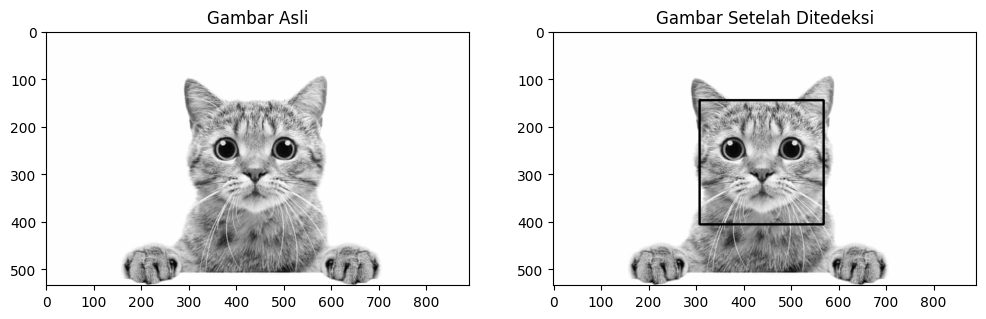

In [ ]:
import cv2
import matplotlib.pyplot as plt

cascade_cat = cv2.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalcatface.xml')

kucing = cv2.imread('/content/drive/MyDrive/Images/facedet/kucing.jpg', 0)

# Tampilkan gambar asli
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(kucing, cv2.COLOR_BGRA2RGB))
plt.title('Gambar Asli')

# mendeteksi wajah
roi_wajah = cascade_cat.detectMultiScale(kucing)

for (x,y,w,h) in roi_wajah:
  cv2.rectangle(kucing,(x,y),(x+w,y+h),(0,255,0),3)
  break

kucing_kotak = cv2.cvtColor(kucing, cv2.COLOR_BGRA2RGB)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(kucing_kotak, cv2.COLOR_BGR2RGB))
plt.title('Gambar Setelah Ditedeksi')
plt.show()

4. Cobakan juga untuk eyes detection pada gambar “Jokowi.jpg”, sehingga menghasilkan gambar seperti berikut.

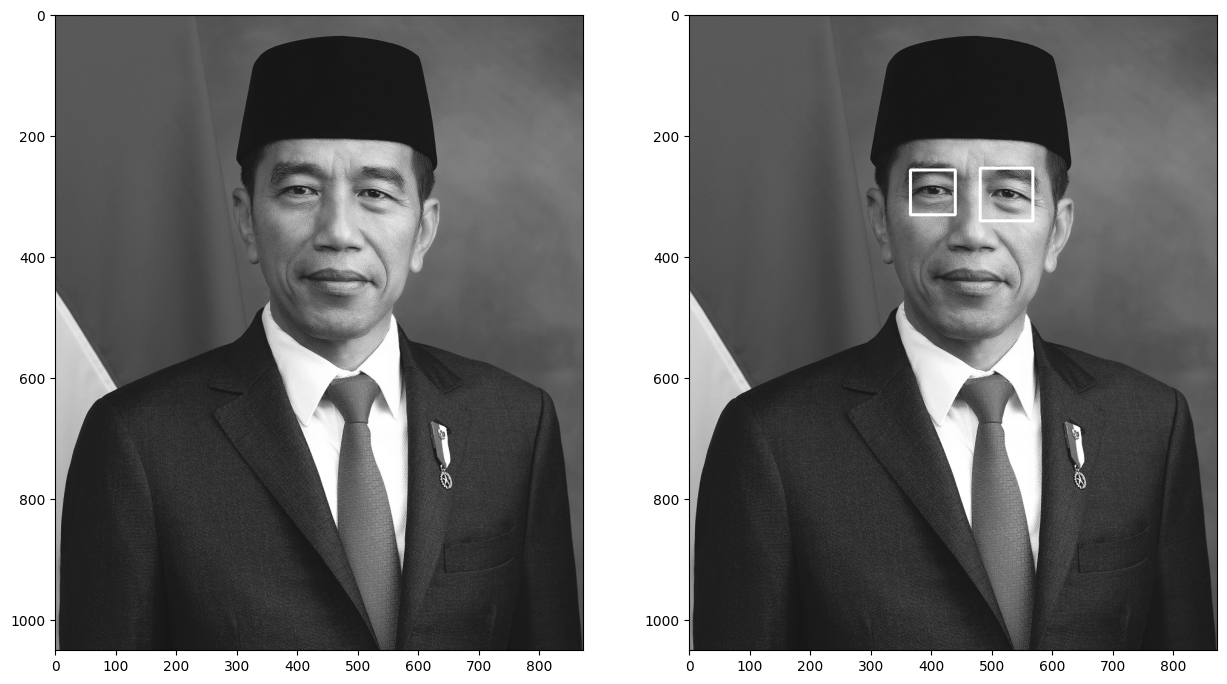

In [ ]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Images/Face Detection/haarcascade_eye.xml')

# Jokowi
jokowi = cv.imread('/content/drive/MyDrive/Images/Face Detection/jokowi.jpg')
jokowi_ori = cv.imread('/content/drive/MyDrive/Images/Face Detection/jokowi.jpg')
jokowi_gray = cv.cvtColor(jokowi, cv.COLOR_BGR2GRAY)
jokowi_ori_gray = cv.cvtColor(jokowi_ori, cv.COLOR_BGR2GRAY)

roi_wajah = cascade_wajah.detectMultiScale(jokowi_gray)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi_gray,(x,y),(x+w,y+h),(255,255,255),3)

# Plot outputs
f, axarr = plt. subplots(1,2,figsize=(15,15))
plt.subplot(121),plt.imshow(jokowi_ori_gray, cmap='gray')
plt.subplot(122),plt.imshow(jokowi_gray, cmap='gray')
plt.show()

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut:
https://www.youtube.com/watch?v=YiWh7QvVH60

In [ ]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64decode(iobuf.getvalue()), 'utf-8')))

  return bbox_to_bytes

In [ ]:
cascade_face = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_alt.xml")

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality){
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  faces = cascade_face.detectMultiScale(gray)
  for(x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0),2)

  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


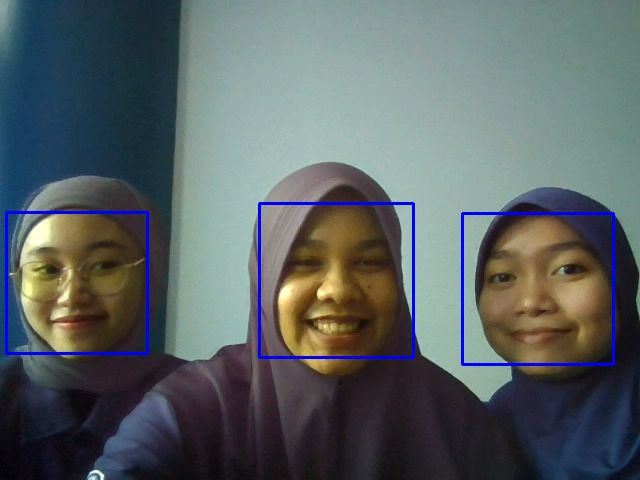

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

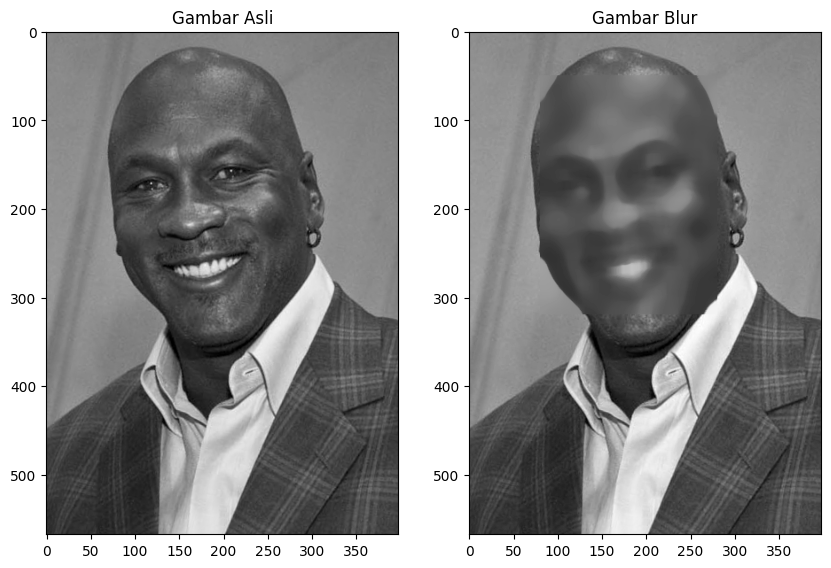

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Baca gambar
image = cv2.imread('/content/drive/MyDrive/Images/facedet/mjordan.jpg')

# Gambar gray
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Tentukan koordinat dan ukuran kotak ROI
x, y, w, h = 80, 50, 200, 270

# Ambil ROI dari gambar
roi = image[y:y+h, x:x+w]

# Ubah ROI menjadi skala abu-abu
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Terapkan medianBlur pada ROI
blurred_roi = cv2.medianBlur(gray_roi, 21)

# Masukkan kembali ROI yang telah di-blur ke dalam gambar asli
image[y:y+h, x:x+w] = cv2.cvtColor(blurred_roi, cv2.COLOR_GRAY2BGR)

# Konversi gambar kedua menjadi skala abu-abu
image_blur_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Plot outputs
f, axarr = plt. subplots(1,2,figsize=(10,10))
plt.subplot(121),plt.imshow(cv2.cvtColor(image_gray, cv2.COLOR_BGRA2RGB)),plt.title('Gambar Asli')
plt.subplot(122),plt.imshow(image_blur_gray, cmap='gray'),plt.title('Gambar Blur')
plt.show()

7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

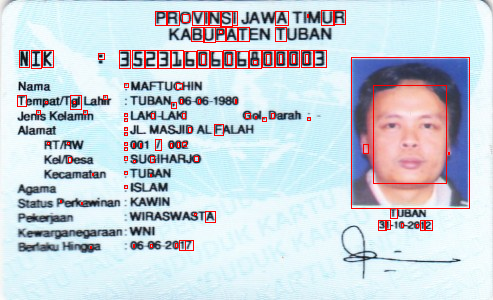

In [ ]:
from google.colab.patches import cv2_imshow

img = cv.imread("/content/drive/MyDrive/Images/KTP_More/ktp4.png")

blurred = cv.GaussianBlur(img, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cv2_imshow(img)

8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

In [ ]:

import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# load data
ktp = cv.imread('/content/drive/MyDrive/Images/KTP_More/ktp3.png')

# Convert the image to grayscale for edge detection
ktp_gray = cv2.cvtColor(ktp, cv2.COLOR_BGR2GRAY)

ktp_gray = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)
ktp_blur = cv.GaussianBlur(
                src=ktp_gray,
                ksize=(5, 5),
                sigmaX=0,
                sigmaY=0)

# Thresholding to create a binary image
ret, thresholded = cv2.threshold(ktp_blur, 100, 255, cv2.THRESH_OTSU)


# Closing to fill gaps between characters
kernel_closing = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel_closing)

# Find contours in the closed image
contours, hierarchy = cv2.findContours(closed, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a separate image
contour_image = ktp.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 6 and float(ras) <= 6:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 15 and w >= 6 and float(ras) <= 7:
      cv2.rectangle(contour_image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

crop_image = contour_image[45:75, 115:330]
cv2.imwrite('NIK_crop.jpg', crop_image)
cv2_imshow(crop_image)

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.

In [ ]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

# Load dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Jumlah data yang ingin diambil dari setiap kategori
num_samples_per_class = 100

# List digit yang akan diambil (0 sampai 9)
digits_to_extract = list(range(10))

# Fungsi untuk mengambil sampel dari setiap kategori
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Ambil sampel dari setiap kategori
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Acak urutan data
np.random.shuffle(training_data)

# Pisahkan fitur dan label
X, Y = zip(*training_data)

# Konversi menjadi numpy array
X = np.array(X).reshape(-1, 28, 28, 1)

# Tulis ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

11490434/11490434 [==============================] - 0s 0us/step


> A. Import terlebih dahulu beberapa yang paket-paket yang dibutuhkan, ada beberapa
paket yang baru misalkan tqdm digunakan untuk meload data diikuti dengan
progress bar, numpy merupakan sebuah paket yang digunakan untuk melakukan
operasi-operasi matriks atau array serta pickle adalah depedensi untuk menyimpan
file untuk model data training.
>
> B. Looping data training yang kelak digunakan untuk melabeli hasil pengenalan.
Looping semua file training untuk diubah ke dalam sebuah image array.
>
> C. Variabel X dan variabel Y digunakan untuk menyimpan label dan feature, label
berisi karakter A-Z dan 0-9 sedangkan feture berisi data image array masing-masing
label tersebut.
>
> D. Terakhir tulis isi variabel X dan variabel Y ke dalam sebuah file pickle. File pickle tersebut nanti akan diload ketika proses training data.

10.  Lakukan Training Data

  Code berikut digunakan untuk melakukan training data

In [ ]:
# Load file pickle
pickle_in = open("X_mnist.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y = pickle.load(pickle_in)

width, height = 28, 28  # Sesuaikan dengan ukuran gambar MNIST

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)

adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')

Epoch 1/20
32/32 [==============================] - 20s 23ms/step - loss: 6.0129 - accuracy: 0.2120
Epoch 2/20
32/32 [==============================] - 0s 10ms/step - loss: 1.5890 - accuracy: 0.4990
Epoch 3/20
32/32 [==============================] - 0s 9ms/step - loss: 0.9261 - accuracy: 0.7000
Epoch 4/20
32/32 [==============================] - 0s 8ms/step - loss: 0.6731 - accuracy: 0.7870
Epoch 5/20
32/32 [==============================] - 0s 9ms/step - loss: 0.4598 - accuracy: 0.8510
Epoch 6/20
32/32 [==============================] - 0s 10ms/step - loss: 0.3572 - accuracy: 0.8890
Epoch 7/20
32/32 [==============================] - 0s 11ms/step - loss: 0.2579 - accuracy: 0.9300
Epoch 8/20
32/32 [==============================] - 0s 10ms/step - loss: 0.1918 - accuracy: 0.9540
Epoch 9/20
32/32 [==============================] - 0s 9ms/step - loss: 0.1494 - accuracy: 0.9690
Epoch 10/20
32/32 [==============================] - 0s 9ms/step - loss: 0.1092 - accuracy: 0.9800
Epoch 11/20
3

  Dengan kode di atas kita akan membuat sebuah model, kode di atas menggunakan
  deep learning dengan arsitektur CNN(Convolutional Neural Network). Sebenarnya
  yang saya ketahui perbedaan mendasar arsitektur ini dengan neural network biasa
  adalah masalah feature extraction, feature merupakan sebuah ciri yang khas yang
  membedakan antara objek satu dengan objek lainnya. Sebagai contoh karakter A dan
  karakter B pada pelat kendaraan tentunya memiliki ciri dengan bentuk yang berbeda.
  Feature extraction yang dimiliki CNN(Convolutional Neural Network) sudah disediakan, kita tinggal mengutak-utik arsitekturnya/parameter yang ada di dalamnya. Sedangkan neural network biasa kita harus mencari sendiri atau dilakukan secara manual untuk mencari feature tersebut. Di bawah ini adalah bagian kode yang digunakan untuk membuat atau membangun sebuah feature tersebut.

11. Testing Data

  Contoh kode berikut digunakan untuk melakukan testing pengenalan karakter

32/32 [==============================] - 0s 3ms/step - loss: 2.2567 - accuracy: 0.9950
Accuracy on the test set: 99.50%


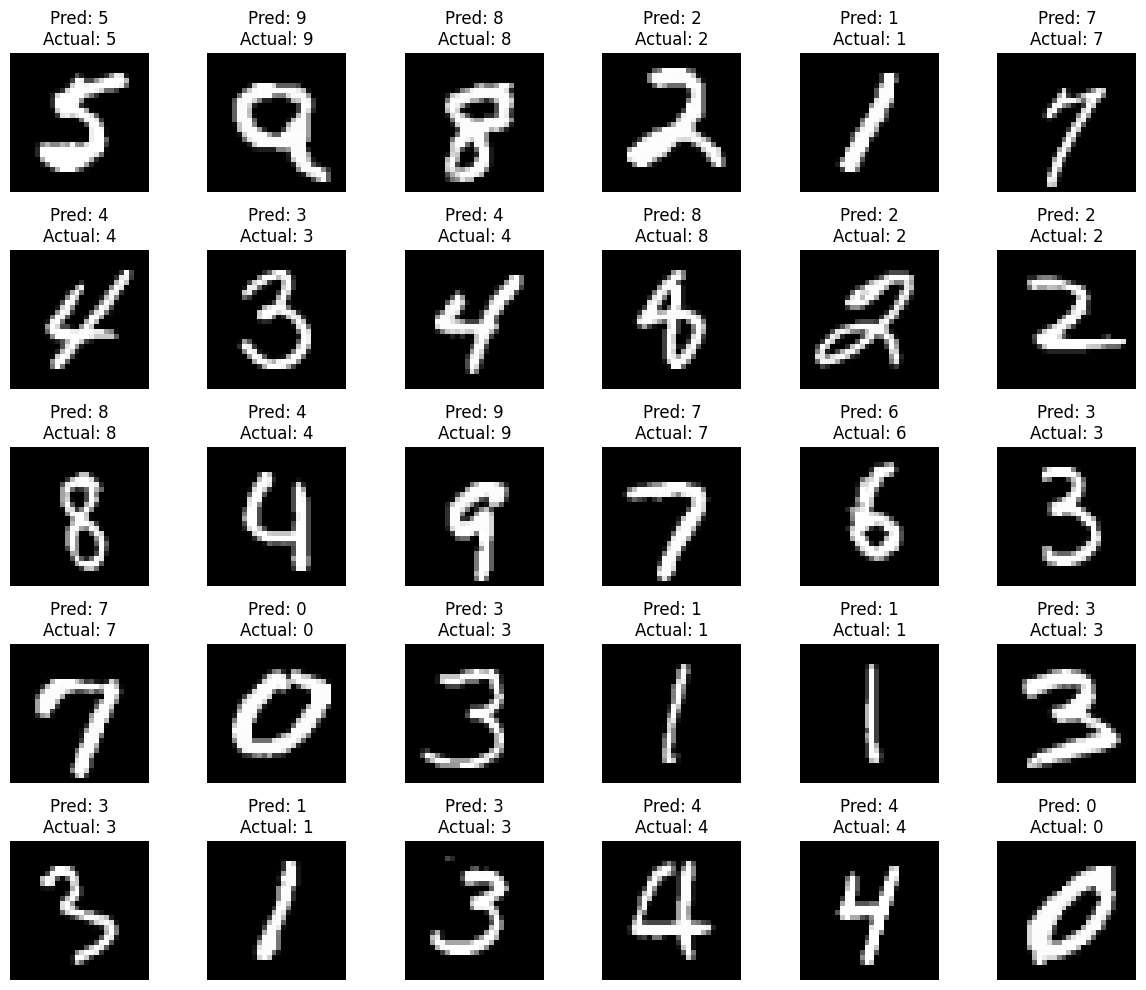

In [ ]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical

# Load dataset MNIST yang sudah disiapkan sebelumnya
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training sebelumnya
model = tf.keras.models.load_model("anpr.model")

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Evaluasi performa model
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

import matplotlib.pyplot as plt

# Tampilkan 30 hasil uji dengan gambarnya
num_results_to_display = 30
fig, axes = plt.subplots(5, 6, figsize=(12, 10))

for i in range(num_results_to_display):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(Y_test[i])

    # Ambil gambar dari data testing
    img = X_test[i].reshape((28, 28))  # Assuming the images are 100x100 pixels

    # Tampilkan gambar dan label
    axes[i // 6, i % 6].imshow(img, cmap='gray')
    axes[i // 6, i % 6].set_title(f'Pred: {predicted_label}\nActual: {actual_label}')
    axes[i // 6, i % 6].axis('off')

plt.tight_layout()
plt.show()

### TUGAS
---

Silakan melakukan pengenalan NIK pada e-KTP yang terdapat pada tugas modul 11!

In [ ]:
# Install Tesseract OCR
!sudo apt install tesseract-ocr

# Install library pytesseract
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 9 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,597 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

(-0.5, 799.5, 487.5, -0.5)

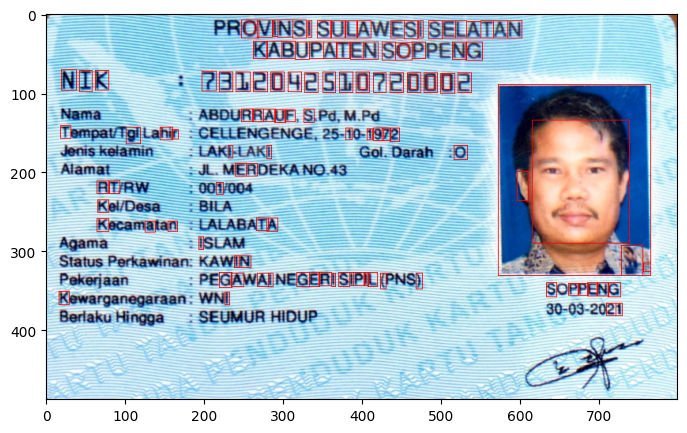

In [ ]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np

ktp = cv.imread("/content/drive/MyDrive/Images/KTP_More/ktp7.png")

# Filtering
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

# Binerisasi citra dengan Otsu's thresholding
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Morfologi erosi
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

plt.figure(figsize=(15,5))
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 5 and float(ras) <= 1:
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Gambar hasil akhir
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))
plt.axis('on')

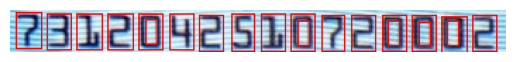

In [ ]:
cropped_nik = ktp[70:100, 193:545]

plt.imshow(cv.cvtColor(cropped_nik, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
import cv2
import pytesseract

# Konversi gambar ke dalam format grayscale
gray_nik = cv2.cvtColor(cropped_nik, cv2.COLOR_BGR2GRAY)

# Contoh praproses: peningkatan kontras
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
preprocessed_nik = clahe.apply(gray_nik)

# Praproses morfologi (closing)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morphed_nik = cv2.morphologyEx(preprocessed_nik, cv2.MORPH_CLOSE, kernel)

# Praproses segmentasi teks menggunakan threshold dinamis
_, threshold_nik = cv2.threshold(morphed_nik, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Contoh segmentasi teks menggunakan pytesseract
custom_config = r'--oem 3 --psm 6 outputbase digits'
nik_text = pytesseract.image_to_string(threshold_nik, config=custom_config)

# Tampilkan hasil pengenalan NIK
print("NIK pada e-KTP: ", nik_text)

NIK pada e-KTP:  312042510720002



In [ ]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from tensorflow.keras.models import load_model

# Resize gambar ke ukuran yang diharapkan oleh model (28, 28)
resized_nik = cv2.resize(gray_nik, (28, 28), interpolation=cv2.INTER_AREA)

# Normalisasi pixel ke rentang 0-1
normalized_nik = resized_nik / 255.0

# Load model ANPR
model_anpr = load_model('anpr.model')

# Reshape gambar untuk memenuhi kebutuhan input model
input_data = np.expand_dims(np.expand_dims(normalized_nik, axis=0), axis=-1)

# Lakukan prediksi
predicted_probs = model_anpr.predict(input_data)[0]

# Tampilkan hasil prediksi
predicted_label = np.argmax(predicted_probs)
predicted_character = chr(ord('0') + predicted_label)
print("Prediksi Karakter:", predicted_character)

1/1 [==============================] - 0s 78ms/step
Prediksi Karakter: 0


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Asumsi ukuran gambar 28x28 pixel
height, width, channels = 28, 28, 1

# Asumsi jumlah kelas (contoh: digit 0-9)
num_classes = 10

# Asumsi dataset MNIST (sesuaikan dengan dataset karakter yang Anda miliki)
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# Praproses dataset
X_train = X_train.reshape(-1, height, width, channels).astype('float32') / 255.0
X_test = X_test.reshape(-1, height, width, channels).astype('float32') / 255.0
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Asumsi model (gunakan arsitektur yang sesuai dengan kebutuhan)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluasi model
accuracy = model.evaluate(X_test, Y_test)[1]
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.1699 - accuracy: 0.9499 - val_loss: 0.0689 - val_accuracy: 0.9809
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0545 - accuracy: 0.9830 - val_loss: 0.0561 - val_accuracy: 0.9828
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.0512 - val_accuracy: 0.9852
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.0659 - val_accuracy: 0.9824
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0167 - accuracy: 0.9945 - val_loss: 0.0571 - val_accuracy: 0.9849
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.0608 - val_accuracy: 0.9844
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0660 - val_accuracy: